# Tugas Proyek Kecil DM ISB-UC

Trisha Alexis Likorawung

0706022110037

In [34]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

I. DECISION TREE

In [2]:
# Load the dataset
data = pd.DataFrame({
    'Weather': ['Sunny', 'Rainy', 'Overcast', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Cool', 'Mild', 'Hot', 'Mild'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Strong'],
    'Play Tennis': ['Yes', 'No', 'Yes', 'Yes', 'No']
})

data.head()

,Weather,Temperature,Wind,Play Tennis
0,Sunny,Hot,Weak,Yes
1,Rainy,Cool,Strong,No
2,Overcast,Mild,Weak,Yes
3,Sunny,Hot,Weak,Yes
4,Rainy,Mild,Strong,No


In [3]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])
data

,Weather,Temperature,Wind,Play Tennis
0,2,1,1,1
1,1,0,0,0
2,0,2,1,1
3,2,1,1,1
4,1,2,0,0


In [4]:
# Split dataset into features (X) and target variable (y)
X = data.drop('Play Tennis', axis=1)
y = data['Play Tennis']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Boosting Model
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

# Bagging Model
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)

# Regression Tree Model
regression_tree_model = DecisionTreeRegressor(random_state=42)
regression_tree_model.fit(X_train, y_train)  # Note: y_train should be a continuous variable for regression

# Predictions
dt_pred = dt_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
bagging_pred = bagging_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
regression_tree_pred = regression_tree_model.predict(X_test)

# Model Evaluation
dt_accuracy = accuracy_score(y_test, dt_pred)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
regression_tree_mse = mean_squared_error(y_test, regression_tree_pred)

# Print Evaluation Metrics
print("Decision Tree Accuracy:", dt_accuracy)
print("Boosting Accuracy:", boosting_accuracy)
print("Bagging Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Regression Tree Mean Squared Error:", regression_tree_mse)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Accuracy: 0.0
Boosting Accuracy: 0.0
Bagging Accuracy: 0.0
Random Forest Accuracy: 0.0
Regression Tree Mean Squared Error: 1.0


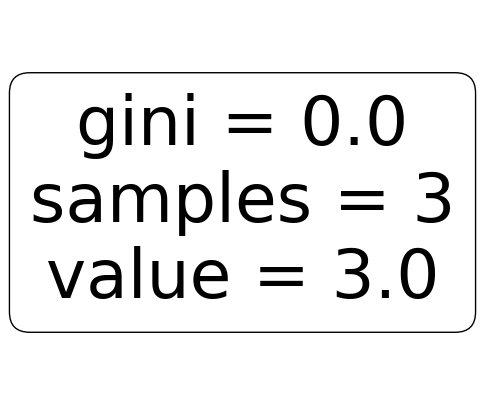

In [9]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the Decision Tree Rules
fig, ax = plt.subplots(figsize=(6, 5))
plot_tree(dt_model, feature_names=X.columns, class_names=['Denied', 'Approved'], filled=True, rounded=True, ax=ax)
plt.show()

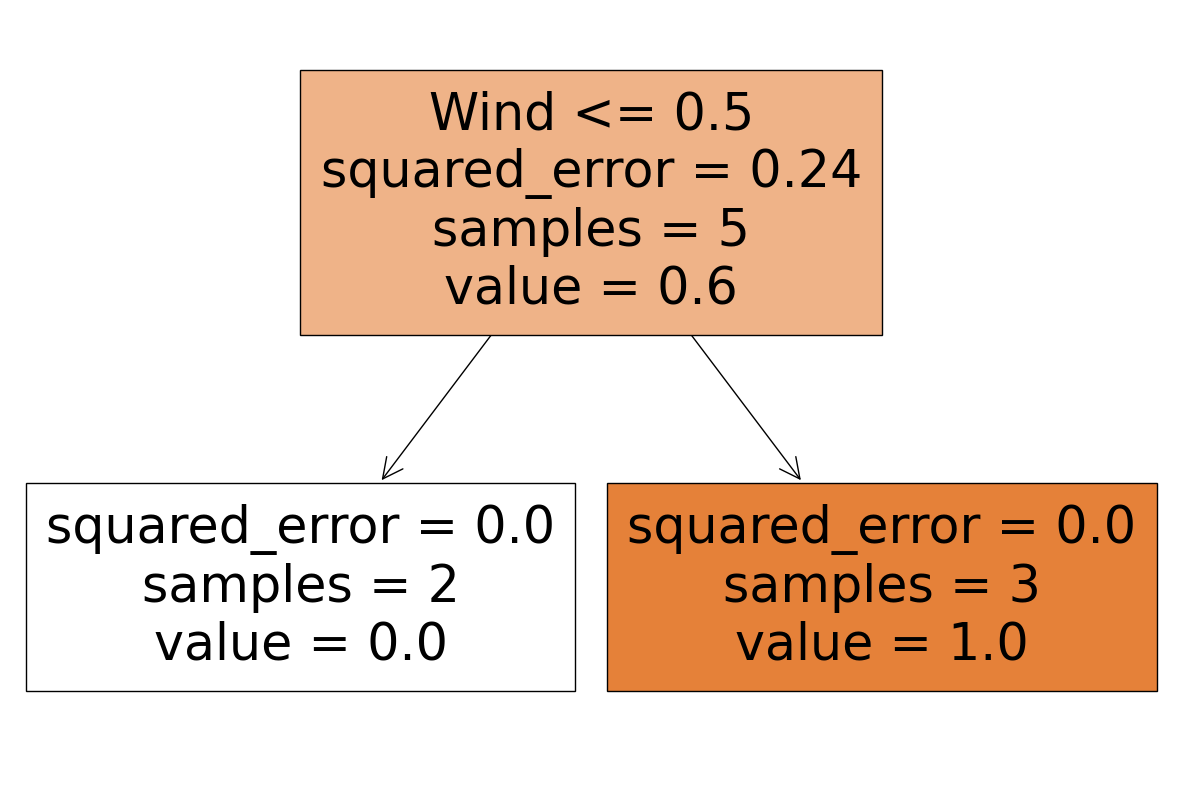

In [7]:
regression_tree = DecisionTreeRegressor(min_samples_leaf=2)
regression_tree.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=list(X.columns), filled=True)
plt.show()

II. CLUSTERING 


In [22]:
# Create a simplified shopping dataset
df = pd.DataFrame({
    'Milk': [2, 1, 0, 3, 4],
    'Bread': [3, 2, 1, 0, 4],
    'Eggs': [1, 4, 2, 0, 3],
    'Butter': [0, 3, 1, 2, 4]
})
df

,Milk,Bread,Eggs,Butter
0,2,3,1,0
1,1,2,4,3
2,0,1,2,1
3,3,0,0,2
4,4,4,3,4


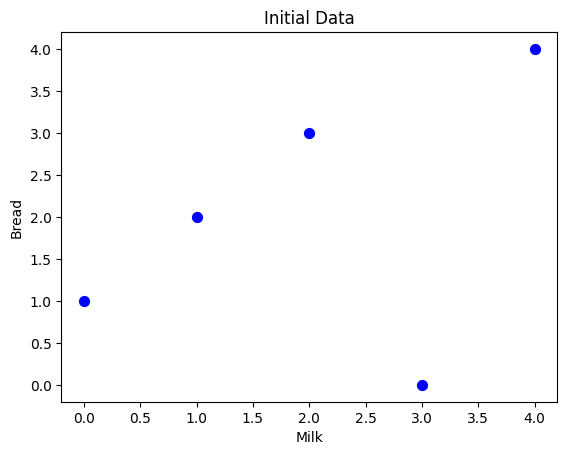

In [23]:
# Visualize the initial data
plt.scatter(df['Milk'], df['Bread'], s=50, color='blue', label='Data Points')
plt.title('Initial Data')
plt.xlabel('Milk')
plt.ylabel('Bread')
plt.show()

In [25]:
# Implement k-Means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


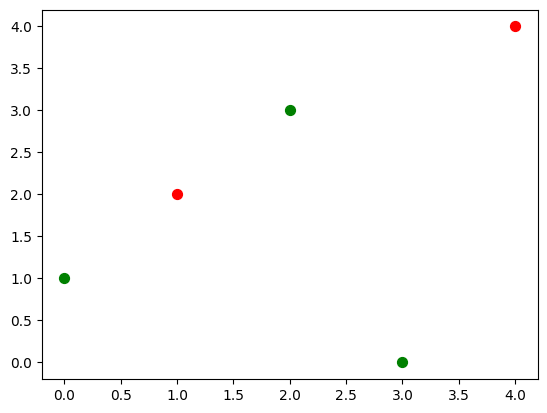

In [26]:
# Visualize the clustered data
colors = ['red', 'green']
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Milk'], cluster_data['Bread'], s=50, color=colors[i], label=f'Cluster {i}')

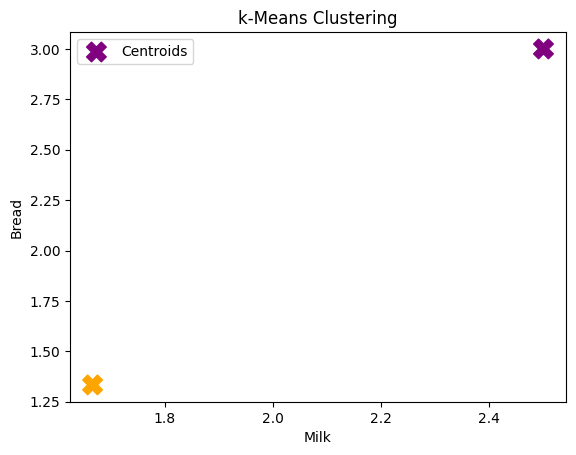

In [32]:
# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color=['purple', 'orange'], marker='X', label='Centroids')
plt.title('k-Means Clustering')
plt.xlabel('Milk')
plt.ylabel('Bread')
plt.legend()
plt.show()


In [33]:
# Display the final cluster assignments
print("Final Cluster Assignments:")
df[['Milk', 'Bread', 'Eggs', 'Butter', 'Cluster']]

Final Cluster Assignments:


,Milk,Bread,Eggs,Butter,Cluster
0,2,3,1,0,1
1,1,2,4,3,0
2,0,1,2,1,1
3,3,0,0,2,1
4,4,4,3,4,0


III. ASSOCIATION RULES MINING

In [36]:
# Contoh dataset pembelian produk
data = {'Transaction': [1, 1, 2, 2, 3, 3, 3, 4, 4, 5],
        'Product': ['Bread', 'Milk', 'Bread', 'Diaper', 'Bread', 'Milk', 'Diaper', 'Bread', 'Milk', 'Diaper']}
df = pd.DataFrame(data)
df

,Transaction,Product
0,1,Bread
1,1,Milk
2,2,Bread
3,2,Diaper
4,3,Bread
5,3,Milk
6,3,Diaper
7,4,Bread
8,4,Milk
9,5,Diaper


In [39]:
# Menerapkan one-hot encoding untuk membuat dataset transaksi
basket = pd.get_dummies(df['Product']).groupby(df['Transaction']).sum()
basket

,Bread,Diaper,Milk
Transaction,,,
1,1,0,1
2,1,1,0
3,1,1,1
4,1,0,1
5,0,1,0


In [40]:
# Menerapkan algoritma Apriori
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
frequent_itemsets

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.8,(Bread)
1,0.6,(Diaper)
2,0.6,(Milk)
3,0.4,"(Diaper, Bread)"
4,0.6,"(Milk, Bread)"
5,0.2,"(Milk, Diaper)"
6,0.2,"(Milk, Diaper, Bread)"


In [42]:
# Menerapkan aturan asosiasi dari itemset yang sering muncul
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Milk),(Bread),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.50
1,(Bread),(Milk),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.00
2,"(Milk, Diaper)",(Bread),0.2,0.8,0.2,1.00,1.25,0.04,inf,0.25
